In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hello = tf.constant("Hello, TensorFlow!")
hi = tf.constant("Hi TensorFlow!!")

sess = tf.Session()

print(sess.run(hello))
print(sess.run(hi))

b'Hello, TensorFlow!'
b'Hi TensorFlow!!'


In [13]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)
node4 = tf.constant(4.5)
node5 = tf.constant(7.9)
node6 = tf.subtract(node5,node4)

print ("node1 : ", node1, "node2 : ", node2)
print("node3 : ", node3)
print("node 4: ", node4)
print("node6 : ", node6)

node1 :  Tensor("Const_10:0", shape=(), dtype=float32) node2 :  Tensor("Const_11:0", shape=(), dtype=float32)
node3 :  Tensor("Add_1:0", shape=(), dtype=float32)
node 4:  Tensor("Const_12:0", shape=(), dtype=float32)
node6 :  Tensor("Sub_1:0", shape=(), dtype=float32)


In [14]:
print("sess.run(node1, node2) : ", sess.run([node1,node2]))
print("sess.run(node3) : ", sess.run(node3))
print("sess.run(node4) : ", sess.run(node4))
print("sess.run(node6) : ", sess.run(node6))

sess.run(node1, node2) :  [3.0, 4.0]
sess.run(node3) :  7.0
sess.run(node4) :  4.5
sess.run(node6) :  3.4


In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
adder_node = a+b
subtract_node = b-c

print (sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print ( sess.run(adder_node, feed_dict = {a: [1,3,4], b:[2,4,3]}))
print (sess.run(subtract_node, feed_dict= {b: 4, c: 5}))

7.5
[ 3.  7.  7.]
-1.0


In [6]:
t = tf.constant([34,3,4])
print(sess.run(t))

[34  3  4]


In [7]:
t = tf.constant([[1,2,3],[4,5,6]])
print(sess.run(t))

[[1 2 3]
 [4 5 6]]


In [8]:
t = tf.constant([[[1,2,3],[3,4,5]]])
print(sess.run(t))

[[[1 2 3]
  [3 4 5]]]


In [9]:
x_train = np.array([1,2,3,4])
y_train = np.array([1,4,9,16])

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = x_train * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step%20 ==0:
        print (step, sess.run(W), sess.run(b))

0 [ 0.43202317] [ 0.53356832]
20 [ 2.90288949] [ 0.96145034]
40 [ 3.08200049] [ 0.63386625]
60 [ 3.19511414] [ 0.30644786]
80 [ 3.30020595] [-0.00240201]
100 [ 3.39914393] [-0.2932879]
120 [ 3.49232197] [-0.56724292]
140 [ 3.58007693] [-0.82525253]
160 [ 3.66272354] [-1.06824458]
180 [ 3.74056005] [-1.29709315]
200 [ 3.81386614] [-1.51262152]
220 [ 3.88290524] [-1.71560502]
240 [ 3.94792604] [-1.90677392]
260 [ 4.00916195] [-2.08681583]
280 [ 4.06683397] [-2.25637817]
300 [ 4.12114906] [-2.41607094]
320 [ 4.17230225] [-2.56646848]
340 [ 4.22047853] [-2.70811224]
360 [ 4.26585054] [-2.8415122]
380 [ 4.30858183] [-2.96714783]
400 [ 4.34882641] [-3.0854702]
420 [ 4.38672876] [-3.19690585]
440 [ 4.42242289] [-3.30185437]
460 [ 4.45604134] [-3.40069485]
480 [ 4.48770285] [-3.49378276]
500 [ 4.5175209] [-3.58145237]
520 [ 4.54560375] [-3.66401935]
540 [ 4.57205153] [-3.74178052]
560 [ 4.59696054] [-3.81501532]
580 [ 4.6204195] [-3.88398767]
600 [ 4.64251328] [-3.94894552]
620 [ 4.66332102] [

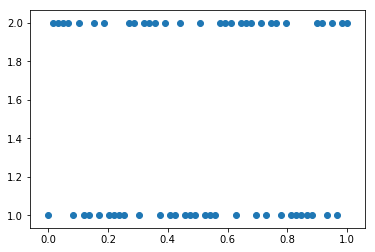

In [119]:
end = 60
data_x = np.linspace(0,1,end)
data_y = np.array(data_x)
for i in range(end):
    data_y[i] = np.random.randint(1,3)

plt.scatter(data_x,data_y)
plt.show()

In [120]:
x_train = np.array(data_x)
y_train = np.array(data_y)
x_sq = x_train**2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable((1.), name='weight')
b = tf.Variable((3.),name="BIAS")
W_2 = tf.Variable((1.), name="weight_x2")

hypothesis = X**2 *W_2 + X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.002)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(5001):
    #cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: x_train, Y: y_train})
    sess.run(train, feed_dict={X: x_train, Y: y_train})
    if step%20 == 0:
        print(step, sess.run(cost, feed_dict={X: x_train, Y: y_train}), sess.run(W_2), sess.run(W),sess.run(b))#, cost_val,  W_val, b_val )
    if step == 5000:
        fin_w2 = sess.run(W_2)
        fin_w = sess.run(W)
        fin_b = sess.run(b)
        fin_a = 0
        print(fin_w2, fin_w, fin_b)
        
# 두가지 버전이 존재한다 플레이스 홀더를 썼다고  train 만 따로 돌릴 수 없는 것은 아니다. 다만~! 
# 위와 같이 세스 런을 맞춰준다면, 쉽게 구할 수 있다. 
# 옵티마이저가 바꿔주는 것은 베리어블이고, 베리어블과 상관 없이 코스트 함수또한 존재하는 베리어블 값만 불러오면 계산 할 수가 있다. 만약 다른걸 너어주면.. 
#값이 바뀌곘지만. 

0 5.98272 0.996163 0.994642 2.99066
20 4.8226 0.92371 0.893517 2.81456
40 3.89766 0.858826 0.803047 2.65749
60 3.16021 0.800701 0.722093 2.51743
80 2.57224 0.748614 0.649636 2.39254
100 2.10344 0.701919 0.584768 2.2812
120 1.72965 0.660042 0.526677 2.18196
140 1.43161 0.622467 0.47464 2.09351
160 1.19395 0.588737 0.42801 2.0147
180 1.00444 0.558441 0.386208 1.94449
200 0.853316 0.531214 0.34872 1.88197
220 0.732793 0.506727 0.315085 1.82631
240 0.636667 0.484691 0.284891 1.77677
260 0.559993 0.464844 0.257771 1.73269
280 0.498827 0.446953 0.233398 1.69348
300 0.450027 0.430811 0.211479 1.65864
320 0.411085 0.416232 0.191752 1.62767
340 0.380003 0.40305 0.173985 1.60018
360 0.355188 0.391118 0.157968 1.57578
380 0.335371 0.380304 0.143515 1.55414
400 0.319538 0.370489 0.130461 1.53496
420 0.306883 0.361569 0.118657 1.51799
440 0.296762 0.353448 0.107971 1.50297
460 0.288661 0.346043 0.0982834 1.48971
480 0.282172 0.33928 0.0894895 1.47801
500 0.276968 0.33309 0.0814946 1.4677
520 0.2727

4020 0.249342 0.177222 -0.101318 1.48791
4040 0.249337 0.177045 -0.101645 1.48816
4060 0.249332 0.17687 -0.10197 1.48841
4080 0.249327 0.176699 -0.102293 1.48866
4100 0.249323 0.17653 -0.102614 1.48891
4120 0.249318 0.176364 -0.102932 1.48915
4140 0.249313 0.1762 -0.103248 1.48939
4160 0.249309 0.176039 -0.103562 1.48963
4180 0.249304 0.175881 -0.103874 1.48987
4200 0.2493 0.175725 -0.104184 1.4901
4220 0.249296 0.175572 -0.104491 1.49033
4240 0.249291 0.175421 -0.104797 1.49056
4260 0.249287 0.175273 -0.1051 1.49079
4280 0.249283 0.175127 -0.105402 1.49102
4300 0.249279 0.174984 -0.105701 1.49124
4320 0.249275 0.174843 -0.105998 1.49146
4340 0.249271 0.174704 -0.106294 1.49168
4360 0.249268 0.174568 -0.106587 1.4919
4380 0.249264 0.174434 -0.106879 1.49212
4400 0.24926 0.174302 -0.107168 1.49233
4420 0.249257 0.174173 -0.107456 1.49254
4440 0.249253 0.174046 -0.107742 1.49275
4460 0.249249 0.173921 -0.108026 1.49296
4480 0.249246 0.173799 -0.108308 1.49317
4500 0.249243 0.173678 -0.10

In [121]:
x_train = np.array(data_x)
y_train = np.array(data_y)
x_sq = x_train**2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable((1.), name='weight')
b = tf.Variable((3.),name="BIAS")
W_2 = tf.Variable((1.1), name="weight_x2")
a = tf.Variable((0.), name="x_chageble")

hypothesis = (X-a)**2 *W_2 + (X-a) * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.2)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(5001):
    #cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: x_train, Y: y_train})
    sess.run(train, feed_dict={X: x_train, Y: y_train})
    if step%20 == 0:
        print(step, sess.run(cost, feed_dict={X: x_train, Y: y_train}), sess.run(W_2), sess.run(W),sess.run(b))#, cost_val,  W_val, b_val )
    if step == 5000:
        fin_w2 = sess.run(W_2)
        fin_w = sess.run(W)
        fin_b = sess.run(b)
        fin_a = sess.run(a)
        print(fin_w2, fin_w, fin_b)
        
# 두가지 버전이 존재한다 플레이스 홀더를 썼다고  train 만 따로 돌릴 수 없는 것은 아니다. 다만~! 
# 위와 같이 세스 런을 맞춰준다면, 쉽게 구할 수 있다. 
# 옵티마이저가 바꿔주는 것은 베리어블이고, 베리어블과 상관 없이 코스트 함수또한 존재하는 베리어블 값만 불러오면 계산 할 수가 있다. 만약 다른걸 너어주면.. 
#값이 바뀌곘지만. 

0 3.76043 0.708087 0.454011 2.05209
20 0.271099 -1.39197 1.4353 1.25272
40 0.269341 -1.31514 1.41743 1.23375
60 0.267757 -1.2433 1.39877 1.21598
80 0.266329 -1.17604 1.3795 1.19899
100 0.265043 -1.11316 1.35969 1.18281
120 0.263886 -1.05445 1.33941 1.16752
140 0.262843 -0.999714 1.31876 1.15314
160 0.261904 -0.948724 1.29782 1.13971
180 0.261058 -0.901264 1.27668 1.12725
200 0.260295 -0.857116 1.25543 1.11576
220 0.259606 -0.816058 1.23414 1.10523
240 0.258984 -0.777877 1.2129 1.09566
260 0.25842 -0.742363 1.19176 1.08701
280 0.257909 -0.709315 1.17079 1.07925
300 0.257445 -0.678542 1.15004 1.07235
320 0.257022 -0.649864 1.12956 1.06627
340 0.256637 -0.62311 1.10936 1.06096
360 0.256285 -0.598123 1.08949 1.05638
380 0.255962 -0.574759 1.06997 1.05248
400 0.255665 -0.552881 1.0508 1.04922
420 0.255393 -0.532368 1.032 1.04656
440 0.255141 -0.513106 1.01357 1.04445
460 0.254908 -0.494993 0.995525 1.04285
480 0.254692 -0.477935 0.977851 1.04172
500 0.254492 -0.461846 0.960549 1.04104
520 0

4160 0.24842 0.313189 -0.571176 1.73307
4180 0.248409 0.316646 -0.575668 1.734
4200 0.248398 0.320096 -0.58011 1.73491
4220 0.248387 0.323538 -0.584502 1.73578
4240 0.248376 0.326971 -0.588843 1.73661
4260 0.248366 0.330394 -0.593132 1.73742
4280 0.248356 0.333807 -0.597371 1.73819
4300 0.248346 0.33721 -0.601558 1.73893
4320 0.248336 0.3406 -0.605693 1.73964
4340 0.248326 0.343977 -0.609776 1.74032
4360 0.248317 0.347341 -0.613807 1.74097
4380 0.248307 0.350691 -0.617786 1.74159
4400 0.248298 0.354026 -0.621712 1.74219
4420 0.248289 0.357345 -0.625586 1.74276
4440 0.24828 0.360648 -0.629407 1.7433
4460 0.248272 0.363933 -0.633175 1.74381
4480 0.248263 0.3672 -0.636891 1.7443
4500 0.248255 0.370449 -0.640554 1.74476
4520 0.248247 0.373678 -0.644165 1.7452
4540 0.248239 0.376887 -0.647723 1.74562
4560 0.248231 0.380074 -0.651229 1.74601
4580 0.248223 0.383241 -0.654682 1.74638
4600 0.248216 0.386384 -0.658083 1.74673
4620 0.248209 0.389505 -0.661431 1.74706
4640 0.248202 0.392602 -0.664

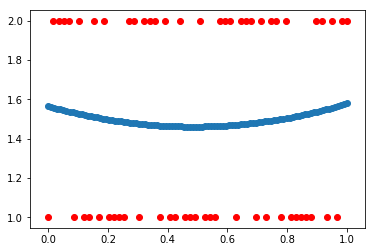

In [122]:
xx = np.linspace(0,1,num=100)
plt.scatter(xx,((xx-fin_a)**2*fin_w2 + (xx-fin_a)*fin_w + fin_b))
plt.scatter(x_train,y_train,c="r")
plt.show()

In [105]:
print(fin_w2, fin_w, fin_b)

-1.06447 0.778161 1.5011
